In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_RULES_FILE , RESOURCE_DIR 
#pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

This script analyse this association rules find in the last version

In [4]:
df = pd.read_excel(RESOURCE_DIR + os.sep + 'historical_rulesv10.xlsx', keep_default_na=False) #'seq_patterns/testes/historical_rules_commit10_197reg_021.xlsx'
#df = pd.read_excel(HISTORICAL_RULES_FILE , keep_default_na=False)
df2 = df.copy()
len(df)
#df.head()
df2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'Snowflake'}),frozenset({'Amazon Redshift'}),0.030457,0.030457,0.025381,0.833333,27.361111,0.024453,5.817259,1,1
1,frozenset({'Amazon Redshift'}),frozenset({'Snowflake'}),0.030457,0.030457,0.025381,0.833333,27.361111,0.024453,5.817259,1,1
2,frozenset({'Google BigQuery'}),frozenset({'Snowflake'}),0.045685,0.030457,0.025381,0.555556,18.240741,0.023989,2.181472,1,1
3,frozenset({'Snowflake'}),frozenset({'Google BigQuery'}),0.030457,0.045685,0.025381,0.833333,18.240741,0.023989,5.725888,1,1
4,frozenset({'Informix'}),frozenset({'Firebird'}),0.045685,0.040609,0.030457,0.666667,16.416667,0.028602,2.878173,1,1
...,...,...,...,...,...,...,...,...,...,...,...
409,frozenset({'Google Cloud Datastore'}),frozenset({'MySQL'}),0.071066,0.441624,0.040609,0.571429,1.293924,0.009225,1.302876,1,1
410,frozenset({'SQLite'}),frozenset({'MongoDB'}),0.137056,0.152284,0.025381,0.185185,1.216049,0.004509,1.040378,1,1
411,frozenset({'MongoDB'}),frozenset({'SQLite'}),0.152284,0.137056,0.025381,0.166667,1.216049,0.004509,1.035533,1,1
412,frozenset({'Cassandra'}),frozenset({'H2'}),0.071066,0.299492,0.025381,0.357143,1.192494,0.004097,1.089679,1,1


In [5]:
df['antecedents'] = df['antecedents'].astype(str)
df['consequents'] = df['consequents'].astype(str)

In [6]:
#Extract the word "frozenset" of the dataframe
df['antecedents'] = df['antecedents'].apply(lambda x: x[len('frozenset({"'):-3])
df['consequents'] = df['consequents'].apply(lambda x: x[len('frozenset({"'):-3])
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Snowflake,Amazon Redshift,0.030457,0.030457,0.025381,0.833333,27.361111,0.024453,5.817259,1,1
1,Amazon Redshift,Snowflake,0.030457,0.030457,0.025381,0.833333,27.361111,0.024453,5.817259,1,1
2,Google BigQuery,Snowflake,0.045685,0.030457,0.025381,0.555556,18.240741,0.023989,2.181472,1,1
3,Snowflake,Google BigQuery,0.030457,0.045685,0.025381,0.833333,18.240741,0.023989,5.725888,1,1
4,Informix,Firebird,0.045685,0.040609,0.030457,0.666667,16.416667,0.028602,2.878173,1,1
...,...,...,...,...,...,...,...,...,...,...,...
409,Google Cloud Datastore,MySQL,0.071066,0.441624,0.040609,0.571429,1.293924,0.009225,1.302876,1,1
410,SQLite,MongoDB,0.137056,0.152284,0.025381,0.185185,1.216049,0.004509,1.040378,1,1
411,MongoDB,SQLite,0.152284,0.137056,0.025381,0.166667,1.216049,0.004509,1.035533,1,1
412,Cassandra,H2,0.071066,0.299492,0.025381,0.357143,1.192494,0.004097,1.089679,1,1


In [7]:
#Create a new columns
df.insert(3,'antecedent_sup_abs', 0, True)
df.insert(5,'consequent_sup_abs', 0, True)
df.insert(7,'support_abs', 0, True)

#Converting the support relative values in absolut values
df['antecedent_sup_abs'] = (df['antecedent support']*197)
df['consequent_sup_abs'] = (df['consequent support']*197)
df['support_abs'] = (df['support']*197)
df

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Snowflake,Amazon Redshift,0.030457,6.0,0.030457,6.0,0.025381,5.0,0.833333,27.361111,0.024453,5.817259,1,1
1,Amazon Redshift,Snowflake,0.030457,6.0,0.030457,6.0,0.025381,5.0,0.833333,27.361111,0.024453,5.817259,1,1
2,Google BigQuery,Snowflake,0.045685,9.0,0.030457,6.0,0.025381,5.0,0.555556,18.240741,0.023989,2.181472,1,1
3,Snowflake,Google BigQuery,0.030457,6.0,0.045685,9.0,0.025381,5.0,0.833333,18.240741,0.023989,5.725888,1,1
4,Informix,Firebird,0.045685,9.0,0.040609,8.0,0.030457,6.0,0.666667,16.416667,0.028602,2.878173,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,Google Cloud Datastore,MySQL,0.071066,14.0,0.441624,87.0,0.040609,8.0,0.571429,1.293924,0.009225,1.302876,1,1
410,SQLite,MongoDB,0.137056,27.0,0.152284,30.0,0.025381,5.0,0.185185,1.216049,0.004509,1.040378,1,1
411,MongoDB,SQLite,0.152284,30.0,0.137056,27.0,0.025381,5.0,0.166667,1.216049,0.004509,1.035533,1,1
412,Cassandra,H2,0.071066,14.0,0.299492,59.0,0.025381,5.0,0.357143,1.192494,0.004097,1.089679,1,1


In [13]:
df2 = df.copy()
df2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Snowflake,Amazon Redshift,0.030457,6.0,0.030457,6.0,0.025381,5.0,0.833333,27.361111,0.024453,5.817259,1,1
1,Amazon Redshift,Snowflake,0.030457,6.0,0.030457,6.0,0.025381,5.0,0.833333,27.361111,0.024453,5.817259,1,1
2,Google BigQuery,Snowflake,0.045685,9.0,0.030457,6.0,0.025381,5.0,0.555556,18.240741,0.023989,2.181472,1,1
3,Snowflake,Google BigQuery,0.030457,6.0,0.045685,9.0,0.025381,5.0,0.833333,18.240741,0.023989,5.725888,1,1
4,Informix,Firebird,0.045685,9.0,0.040609,8.0,0.030457,6.0,0.666667,16.416667,0.028602,2.878173,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,Google Cloud Datastore,MySQL,0.071066,14.0,0.441624,87.0,0.040609,8.0,0.571429,1.293924,0.009225,1.302876,1,1
410,SQLite,MongoDB,0.137056,27.0,0.152284,30.0,0.025381,5.0,0.185185,1.216049,0.004509,1.040378,1,1
411,MongoDB,SQLite,0.152284,30.0,0.137056,27.0,0.025381,5.0,0.166667,1.216049,0.004509,1.035533,1,1
412,Cassandra,H2,0.071066,14.0,0.299492,59.0,0.025381,5.0,0.357143,1.192494,0.004097,1.089679,1,1


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [9]:
rules1b = df2.sort_values(['support',], ascending=[False])
rules1b

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
298,PostgreSQL,MySQL,0.309645,61.0,0.441624,87.0,0.263959,52.0,0.852459,1.930281,0.127213,3.784546,1,1
299,MySQL,PostgreSQL,0.441624,87.0,0.309645,61.0,0.263959,52.0,0.597701,1.930281,0.127213,1.716026,1,1
353,H2,MySQL,0.299492,59.0,0.441624,87.0,0.218274,43.0,0.728814,1.650302,0.086011,2.059010,1,1
352,MySQL,H2,0.441624,87.0,0.299492,59.0,0.218274,43.0,0.494253,1.650302,0.086011,1.385095,1,1
369,MySQL,Redis,0.441624,87.0,0.263959,52.0,0.182741,36.0,0.413793,1.567639,0.066170,1.255599,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,PostGIS,H2,0.030457,6.0,0.299492,59.0,0.025381,5.0,0.833333,2.782486,0.016259,4.203046,1,1
183,H2,PostGIS,0.299492,59.0,0.030457,6.0,0.025381,5.0,0.084746,2.782486,0.016259,1.059316,1,1
184,H2,MS Access,0.299492,59.0,0.030457,6.0,0.025381,5.0,0.084746,2.782486,0.016259,1.059316,1,1
185,H2,Amazon Redshift,0.299492,59.0,0.030457,6.0,0.025381,5.0,0.084746,2.782486,0.016259,1.059316,1,1


In [10]:
rules1a = df2[(df2['antecedent support'] >= 0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1a = rules1a.groupby('antecedents').mean().sort_values(['antecedent support',], ascending=[False])
rules1a

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.441624,87.0,0.108774,21.428571,0.085932,16.928571,0.194581,1.909593,0.037894,1.131064,1.0,1.0
PostgreSQL,0.309645,61.0,0.113488,22.357143,0.078136,15.392857,0.252342,2.523888,0.042995,1.295733,1.0,1.0
H2,0.299492,59.0,0.118899,23.423077,0.066966,13.192308,0.223598,2.140782,0.031357,1.184453,1.0,1.0
Redis,0.263959,52.0,0.147742,29.105263,0.069463,13.684211,0.263158,1.920918,0.030465,1.197324,1.0,1.0
Oracle,0.253807,50.0,0.119485,23.538462,0.063061,12.423077,0.248462,2.515317,0.032735,1.233606,1.0,1.0
Ehcache,0.218274,43.0,0.172272,33.937500,0.064404,12.687500,0.295058,1.768168,0.026801,1.218461,1.0,1.0
MariaDB,0.182741,36.0,0.138023,27.190476,0.062364,12.285714,0.341270,3.228804,0.037142,1.568395,1.0,1.0
MS SQL Server,0.157360,31.0,0.127750,25.166667,0.059222,11.666667,0.376344,3.858823,0.039119,2.020680,1.0,1.0
MongoDB,0.152284,30.0,0.163847,32.277778,0.053017,10.444444,0.348148,2.563110,0.028066,1.324415,1.0,1.0


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [11]:
rules1 = df2[(df2['consequent support'] >= 0.13)] #0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1 = rules1.groupby('consequents').mean().sort_values(['consequent support',], ascending=[False])
rules1

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.108774,21.428571,0.441624,87.0,0.085932,16.928571,0.843323,1.909593,0.037894,NaN,1.0,1.0
PostgreSQL,0.113488,22.357143,0.309645,61.0,0.078136,15.392857,0.781508,2.523888,0.042995,NaN,1.0,1.0
H2,0.118899,23.423077,0.299492,59.0,0.066966,13.192308,0.641148,2.140782,0.031357,NaN,1.0,1.0
Redis,0.147742,29.105263,0.263959,52.0,0.069463,13.684211,0.507044,1.920918,0.030465,1.686226,1.0,1.0
Oracle,0.119485,23.538462,0.253807,50.0,0.063061,12.423077,0.638405,2.515317,0.032735,NaN,1.0,1.0
Ehcache,0.172272,33.937500,0.218274,43.0,0.064404,12.687500,0.385945,1.768168,0.026801,1.281182,1.0,1.0
MariaDB,0.138023,27.190476,0.182741,36.0,0.062364,12.285714,0.590035,3.228804,0.037142,NaN,1.0,1.0
MS SQL Server,0.127750,25.166667,0.157360,31.0,0.059222,11.666667,0.607226,3.858823,0.039119,NaN,1.0,1.0
MongoDB,0.163847,32.277778,0.152284,30.0,0.053017,10.444444,0.390321,2.563110,0.028066,1.512583,1.0,1.0


In [27]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support','antecedent_sup_abs'], ascending=[False,False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.08)] 
rules1c

antecedent support  antecedent_sup_abs  \
antecedents consequents                                           
MySQL       PostgreSQL             0.441624                87.0   
PostgreSQL  MySQL                  0.309645                61.0   
MySQL       H2                     0.441624                87.0   
H2          MySQL                  0.299492                59.0   
MySQL       Redis                  0.441624                87.0   
...                                     ...                 ...   
SapHana     MariaDB                0.025381                 5.0   
            MySQL                  0.025381                 5.0   
            Oracle                 0.025381                 5.0   
            PostgreSQL             0.025381                 5.0   
            SQLite                 0.025381                 5.0   

                         consequent support  consequent_sup_abs   support  \
antecedents consequents                                                     
MySQL       PostgreSQL             0.309645                61.0  0.263959   
PostgreSQL  MySQL                  0.441624                87.0  0.263959   
MySQL       H2                     0.299492                59.0  0.218274   
H2          MySQL                  0.441624                87.0  0.218274   
MySQL       Redis                  0.263959                52.0  0.182741   
...                                     ...                 ...       ...   
SapHana     MariaDB                0.182741                36.0  0.025381   
            MySQL                  0.441624                87.0  0.025381   
            Oracle                 0.253807                50.0  0.025381   
            PostgreSQL             0.309645                61.0  0.025381   
            SQLite                 0.137056                27.0  0.025381   

                         support_abs  confidence      lift  leverage  \
antecedents consequents                                                
MySQL       PostgreSQL          52.0    0.597701  1.930281  0.127213   
PostgreSQL  MySQL               52.0    0.852459  1.930281  0.127213   
MySQL       H2                  43.0    0.494253  1.650302  0.086011   
H2          MySQL               43.0    0.728814  1.650302  0.086011   
MySQL       Redis               36.0    0.413793  1.567639  0.066170   
...                              ...         ...       ...       ...   
SapHana     MariaDB              5.0    1.000000  5.472222  0.020743   
            MySQL                5.0    1.000000  2.264368  0.014172   
            Oracle               5.0    1.000000  3.940000  0.018939   
            PostgreSQL           5.0    1.000000  3.229508  0.017522   
            SQLite               5.0    1.000000  7.296296  0.021902   

                         conviction  antecedent_len  consequente_len  
antecedents consequents                                               
MySQL       PostgreSQL     1.716026             1.0              1.0  
PostgreSQL  MySQL          3.784546             1.0              1.0  
MySQL       H2             1.385095             1.0              1.0  
H2          MySQL          2.059010             1.0              1.0  
MySQL       Redis          1.255599             1.0              1.0  
...                             ...             ...              ...  
SapHana     MariaDB             inf             1.0              1.0  
            MySQL               inf             1.0              1.0  
            Oracle              inf             1.0              1.0  
            PostgreSQL          inf             1.0              1.0  
            SQLite              inf             1.0              1.0  

[414 rows x 12 columns]

In [20]:
# In this section we eliminate the inverted rules
#Always run this before reset.index()
#Used only for the correlation diagram
new_index = []

for index in rules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(rules1c.index)
rules1c = rules1c.loc[new_index,:]
rules1c

antecedent support  antecedent_sup_abs  \
antecedents consequents                                             
PostgreSQL  MySQL                    0.309645                61.0   
MySQL       H2                       0.441624                87.0   
            Redis                    0.441624                87.0   
H2          PostgreSQL               0.299492                59.0   
MySQL       Oracle                   0.441624                87.0   
...                                       ...                 ...   
DynamoDB    MariaDB                  0.065990                13.0   
            Oracle                   0.065990                13.0   
Ehcache     Hive                     0.218274                43.0   
PostGIS     MS SQL Server            0.030457                 6.0   
MS Access   MS SQL Server            0.030457                 6.0   

                           consequent support  consequent_sup_abs   support  \
antecedents consequents                                                       
PostgreSQL  MySQL                    0.441624                87.0  0.263959   
MySQL       H2                       0.299492                59.0  0.218274   
            Redis                    0.263959                52.0  0.182741   
H2          PostgreSQL               0.309645                61.0  0.182741   
MySQL       Oracle                   0.253807                50.0  0.177665   
...                                       ...                 ...       ...   
DynamoDB    MariaDB                  0.182741                36.0  0.025381   
            Oracle                   0.253807                50.0  0.025381   
Ehcache     Hive                     0.055838                11.0  0.025381   
PostGIS     MS SQL Server            0.157360                31.0  0.025381   
MS Access   MS SQL Server            0.157360                31.0  0.025381   

                           support_abs  confidence      lift  leverage  \
antecedents consequents                                                  
PostgreSQL  MySQL                 52.0    0.852459  1.930281  0.127213   
MySQL       H2                    43.0    0.494253  1.650302  0.086011   
            Redis                 36.0    0.413793  1.567639  0.066170   
H2          PostgreSQL            36.0    0.610169  1.970547  0.090005   
MySQL       Oracle                35.0    0.402299  1.585057  0.065578   
...                                ...         ...       ...       ...   
DynamoDB    MariaDB                5.0    0.384615  2.104701  0.013322   
            Oracle                 5.0    0.384615  1.515385  0.008632   
Ehcache     Hive                   5.0    0.116279  2.082452  0.013193   
PostGIS     MS SQL Server          5.0    0.833333  5.295699  0.020588   
MS Access   MS SQL Server          5.0    0.833333  5.295699  0.020588   

                           conviction  antecedent_len  consequente_len  
antecedents consequents                                                 
PostgreSQL  MySQL            3.784546             1.0              1.0  
MySQL       H2               1.385095             1.0              1.0  
            Redis            1.255599             1.0              1.0  
H2          PostgreSQL       1.770911             1.0              1.0  
MySQL       Oracle           1.248438             1.0              1.0  
...                               ...             ...              ...  
DynamoDB    MariaDB          1.328046             1.0              1.0  
            Oracle           1.212563             1.0              1.0  
Ehcache     Hive             1.068394             1.0              1.0  
PostGIS     MS SQL Server    5.055838             1.0              1.0  
MS Access   MS SQL Server    5.055838             1.0              1.0  

[207 rows x 12 columns]

In [28]:
rules1c = rules1c.reset_index()
rules1c

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.441624,87.0,0.309645,61.0,0.263959,52.0,0.597701,1.930281,0.127213,1.716026,1.0,1.0
1,PostgreSQL,MySQL,0.309645,61.0,0.441624,87.0,0.263959,52.0,0.852459,1.930281,0.127213,3.784546,1.0,1.0
2,MySQL,H2,0.441624,87.0,0.299492,59.0,0.218274,43.0,0.494253,1.650302,0.086011,1.385095,1.0,1.0
3,H2,MySQL,0.299492,59.0,0.441624,87.0,0.218274,43.0,0.728814,1.650302,0.086011,2.059010,1.0,1.0
4,MySQL,Redis,0.441624,87.0,0.263959,52.0,0.182741,36.0,0.413793,1.567639,0.066170,1.255599,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,SapHana,MariaDB,0.025381,5.0,0.182741,36.0,0.025381,5.0,1.000000,5.472222,0.020743,inf,1.0,1.0
410,SapHana,MySQL,0.025381,5.0,0.441624,87.0,0.025381,5.0,1.000000,2.264368,0.014172,inf,1.0,1.0
411,SapHana,Oracle,0.025381,5.0,0.253807,50.0,0.025381,5.0,1.000000,3.940000,0.018939,inf,1.0,1.0
412,SapHana,PostgreSQL,0.025381,5.0,0.309645,61.0,0.025381,5.0,1.000000,3.229508,0.017522,inf,1.0,1.0


In [53]:
#if you need to generate the rules in excel
#rules_filter = rules1c.to_excel('rules_filtersv10.xlsx', index=False)

This chart shows all the rules for the BDs used together in last version.

In [16]:
#Graph generated with all rules without the support filter
import plotly.express as px 
#data = rules1c.sort_values(['support_abs'], ascending=[False])
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#df = px.data.gapminder('support_abs')
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
size = "support_abs", color="support_abs", title='Correlation of the most frequent databases in last version',
hover_data=['support_abs'],color_continuous_scale = ["silver","gray"],width = 1000, height=1000, text='support_abs')
#fig.add_annotation(text= 'hover_data')
                  #xref="antecedent_support", yref="consequent_support",
                 #x=0.3, y=0.3, showarrow=False)
#fig.update_traces(textposition='inside')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [24]:
#Test showing the rules without inverted repetitions and without the sort function
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the last version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"], width = 1000, height=1000, text='support_abs')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [29]:
#In this section the dataframe is ordered
orules1c = rules1c.sort_values(['support_abs'], ascending=[False])

order = {}
current = 1
for index, row in orules1c.iterrows():
    if row['antecedents'] not in order:
        order[row['antecedents']] = current
        current += 1
for index, row in orules1c.iterrows():
    if row['consequents'] not in order:
        order[row['consequents']] = current
        current += 1
#function ordering
def order_fn(x):
    if x.name == 'support_abs':
        return x
    return x.apply(lambda element: order[element])

orules1c = orules1c.sort_values(by=['antecedents', 'consequents', 'support_abs'], key=order_fn)

orules1c['consequents'] = pd.Categorical(orules1c['consequents'], order.keys())
orules1c['antecedents'] = pd.Categorical(orules1c['antecedents'], order.keys())
orules1c
order

{'MySQL': 1,
 'PostgreSQL': 2,
 'H2': 3,
 'Redis': 4,
 'Oracle': 5,
 'MariaDB': 6,
 'MS SQL Server': 7,
 'Ehcache': 8,
 'IBM DB2': 9,
 'MongoDB': 10,
 'SQLite': 11,
 'Elasticsearch': 12,
 'SAP Adaptive Server': 13,
 'Cassandra': 14,
 'HBase': 15,
 'Solr': 16,
 'Hive': 17,
 'DynamoDB': 18,
 'Hazelcast': 19,
 'Informix': 20,
 'Google Cloud Datastore': 21,
 'Google BigQuery': 22,
 'Firebird': 23,
 'ClickHouse': 24,
 'Amazon Redshift': 25,
 'MS Access': 26,
 'PostGIS': 27,
 'Snowflake': 28,
 'SapHana': 29}

In [52]:
#if you need to generate the rules in excel
#rules_filter = orules1c.to_excel('rules_filtersv10_order.xlsx', index=False)

In [19]:
orules1c = orules1c.set_index(['antecedents','consequents'])
orules1c

antecedent support  antecedent_sup_abs  \
antecedents consequents                                             
PostgreSQL  MySQL                    0.309645                61.0   
            H2                       0.309645                61.0   
            Redis                    0.309645                61.0   
            Oracle                   0.309645                61.0   
            MariaDB                  0.309645                61.0   
...                                       ...                 ...   
SapHana     Oracle                   0.025381                 5.0   
            MariaDB                  0.025381                 5.0   
            MS SQL Server            0.025381                 5.0   
            IBM DB2                  0.025381                 5.0   
            SQLite                   0.025381                 5.0   

                           consequent support  consequent_sup_abs   support  \
antecedents consequents                                                       
PostgreSQL  MySQL                    0.441624                87.0  0.263959   
            H2                       0.299492                59.0  0.182741   
            Redis                    0.263959                52.0  0.147208   
            Oracle                   0.253807                50.0  0.167513   
            MariaDB                  0.182741                36.0  0.147208   
...                                       ...                 ...       ...   
SapHana     Oracle                   0.253807                50.0  0.025381   
            MariaDB                  0.182741                36.0  0.025381   
            MS SQL Server            0.157360                31.0  0.025381   
            IBM DB2                  0.101523                20.0  0.025381   
            SQLite                   0.137056                27.0  0.025381   

                           support_abs  confidence      lift  leverage  \
antecedents consequents                                                  
PostgreSQL  MySQL                 52.0    0.852459  1.930281  0.127213   
            H2                    36.0    0.590164  1.970547  0.090005   
            Redis                 29.0    0.475410  1.801072  0.065475   
            Oracle                33.0    0.540984  2.131475  0.088923   
            MariaDB               29.0    0.475410  2.601548  0.090623   
...                                ...         ...       ...       ...   
SapHana     Oracle                 5.0    1.000000  3.940000  0.018939   
            MariaDB                5.0    1.000000  5.472222  0.020743   
            MS SQL Server          5.0    1.000000  6.354839  0.021387   
            IBM DB2                5.0    1.000000  9.850000  0.022804   
            SQLite                 5.0    1.000000  7.296296  0.021902   

                           conviction  antecedent_len  consequente_len  
antecedents consequents                                                 
PostgreSQL  MySQL            3.784546             1.0              1.0  
            H2               1.709239             1.0              1.0  
            Redis            1.403077             1.0              1.0  
            Oracle           1.625635             1.0              1.0  
            MariaDB          1.557900             1.0              1.0  
...                               ...             ...              ...  
SapHana     Oracle                inf             1.0              1.0  
            MariaDB               inf             1.0              1.0  
            MS SQL Server         inf             1.0              1.0  
            IBM DB2               inf             1.0              1.0  
            SQLite                inf             1.0              1.0  

[414 rows x 12 columns]

In [41]:
orules1c.dtypes

antecedents           category
consequents           category
antecedent support     float64
antecedent_sup_abs     float64
consequent support     float64
consequent_sup_abs     float64
support                float64
support_abs            float64
confidence             float64
lift                   float64
leverage               float64
conviction             float64
antecedent_len         float64
consequente_len        float64
dtype: object

In [21]:
#Removing after ordination
#orules1c['support_abs'] = orules1c['support_abs'].astype(int)
# In this section we eliminate the inverted rules
#Always run this for before reset.index()
new_index = []

for index in orules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(orules1c.index)
orules1c = orules1c.loc[new_index,:]
orules1c

antecedent support  \
antecedents     consequents                                  
PostgreSQL      MySQL                             0.309645   
                H2                                0.309645   
                Redis                             0.309645   
                Oracle                            0.309645   
                MariaDB                           0.309645   
...                                                    ...   
Solr            Google Cloud Datastore            0.065990   
Hive            Google BigQuery                   0.055838   
Informix        Firebird                          0.045685   
Google BigQuery Snowflake                         0.045685   
Amazon Redshift Snowflake                         0.030457   

                                        antecedent_sup_abs  \
antecedents     consequents                                  
PostgreSQL      MySQL                                 61.0   
                H2                                    61.0   
                Redis                                 61.0   
                Oracle                                61.0   
                MariaDB                               61.0   
...                                                    ...   
Solr            Google Cloud Datastore                13.0   
Hive            Google BigQuery                       11.0   
Informix        Firebird                               9.0   
Google BigQuery Snowflake                              9.0   
Amazon Redshift Snowflake                              6.0   

                                        consequent support  \
antecedents     consequents                                  
PostgreSQL      MySQL                             0.441624   
                H2                                0.299492   
                Redis                             0.263959   
                Oracle                            0.253807   
                MariaDB                           0.182741   
...                                                    ...   
Solr            Google Cloud Datastore            0.071066   
Hive            Google BigQuery                   0.045685   
Informix        Firebird                          0.040609   
Google BigQuery Snowflake                         0.030457   
Amazon Redshift Snowflake                         0.030457   

                                        consequent_sup_abs   support  \
antecedents     consequents                                            
PostgreSQL      MySQL                                 87.0  0.263959   
                H2                                    59.0  0.182741   
                Redis                                 52.0  0.147208   
                Oracle                                50.0  0.167513   
                MariaDB                               36.0  0.147208   
...                                                    ...       ...   
Solr            Google Cloud Datastore                14.0  0.025381   
Hive            Google BigQuery                        9.0  0.025381   
Informix        Firebird                               8.0  0.030457   
Google BigQuery Snowflake                              6.0  0.025381   
Amazon Redshift Snowflake                              6.0  0.025381   

                                        support_abs  confidence       lift  \
antecedents     consequents                                                  
PostgreSQL      MySQL                          52.0    0.852459   1.930281   
                H2                             36.0    0.590164   1.970547   
                Redis                          29.0    0.475410   1.801072   
                Oracle                         33.0    0.540984   2.131475   
                MariaDB                        29.0    0.475410   2.601548   
...                                             ...         ...        ...   
Solr            Google Cloud Datastore          5.0    0.3

In [22]:
orules1c = orules1c.reset_index()
orules1c

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,PostgreSQL,MySQL,0.309645,61.0,0.441624,87.0,0.263959,52.0,0.852459,1.930281,0.127213,3.784546,1.0,1.0
1,PostgreSQL,H2,0.309645,61.0,0.299492,59.0,0.182741,36.0,0.590164,1.970547,0.090005,1.709239,1.0,1.0
2,PostgreSQL,Redis,0.309645,61.0,0.263959,52.0,0.147208,29.0,0.475410,1.801072,0.065475,1.403077,1.0,1.0
3,PostgreSQL,Oracle,0.309645,61.0,0.253807,50.0,0.167513,33.0,0.540984,2.131475,0.088923,1.625635,1.0,1.0
4,PostgreSQL,MariaDB,0.309645,61.0,0.182741,36.0,0.147208,29.0,0.475410,2.601548,0.090623,1.557900,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Solr,Google Cloud Datastore,0.065990,13.0,0.071066,14.0,0.025381,5.0,0.384615,5.412088,0.020691,1.509518,1.0,1.0
203,Hive,Google BigQuery,0.055838,11.0,0.045685,9.0,0.025381,5.0,0.454545,9.949495,0.022830,1.749577,1.0,1.0
204,Informix,Firebird,0.045685,9.0,0.040609,8.0,0.030457,6.0,0.666667,16.416667,0.028602,2.878173,1.0,1.0
205,Google BigQuery,Snowflake,0.045685,9.0,0.030457,6.0,0.025381,5.0,0.555556,18.240741,0.023989,2.181472,1.0,1.0


In [111]:
#Test showing the rules without inverted repetitions and with the sort function
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(orules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the last version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"],width = 800, height=800,text='support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

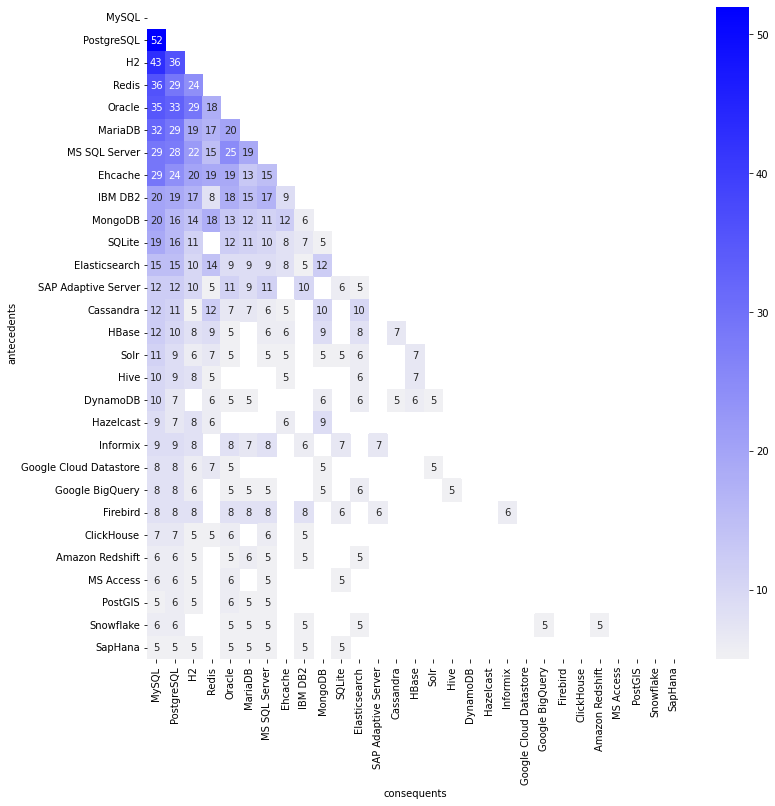

In [30]:
#Generating a heatmap without repetitions, with function ordering, following the tip:
# generate the complete heatmap with the y axis inverted and
# use the parameter mask=np.triu(np.ones_like(df)) in sns.heatmap
import seaborn as sns
pivot = orules1c.pivot(index='antecedents', columns='consequents', values='support_abs')
#pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True, cmap=sns.color_palette("light:b", as_cmap=True), annot=True,
    mask=np.triu(np.ones_like(pivot)))
fig = plt.gcf()
fig.set_size_inches(12, 12)

In [88]:
lista = []
lista = orules1c['antecedents'].drop_duplicates()
lista

0               PostgreSQL
28                   MySQL
55                      H2
79                   Redis
95                  Oracle
117                MariaDB
133          MS SQL Server
151                Ehcache
160                MongoDB
170                IBM DB2
179                 SQLite
185          Elasticsearch
194                  HBase
198              Cassandra
199    SAP Adaptive Server
201                   Solr
203                   Hive
204               Informix
205        Google BigQuery
206        Amazon Redshift
Name: antecedents, dtype: object

In [69]:
pivot = orules1c.pivot(index='antecedents', columns='consequents', values='support_abs')

In [70]:
pivot = pivot.reset_index()

In [74]:
pivot

consequents,antecedents,Amazon Redshift,Cassandra,ClickHouse,DynamoDB,Ehcache,Elasticsearch,Firebird,Google BigQuery,Google Cloud Datastore,...,MongoDB,MySQL,Oracle,PostGIS,Redis,SAP Adaptive Server,SQLite,SapHana,Snowflake,Solr
0,Amazon Redshift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
1,Cassandra,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ehcache,NaN,5.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,...,12.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,5.0
3,Elasticsearch,5.0,9.0,NaN,5.0,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,5.0
4,Google BigQuery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
5,H2,5.0,5.0,5.0,NaN,19.0,9.0,7.0,5.0,5.0,...,14.0,NaN,29.0,5.0,24.0,9.0,11.0,5.0,NaN,5.0
6,HBase,NaN,7.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
7,Hive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,IBM DB2,5.0,NaN,5.0,NaN,NaN,5.0,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.0,7.0,5.0,5.0,NaN
9,Informix,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Test generating the graph with all the rules ordered with the sort function
import plotly.express as px 
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#rules1c = rules1c.sort_values(['support_abs'], ascending=[False])
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
fig = px.scatter(orules1c, x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the last version',
hover_data=['support_abs'], color_continuous_scale = ["silver", "gray"], width=1000, height=1000, text= 'support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In [14]:
#Test sorting only by support, after the sort function
orules1cd = orules1c.sort_values(by=['support_abs'], ascending=False)
orules1cd

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,PostgreSQL,MySQL,0.309645,61.0,0.441624,87.0,0.263959,52,0.852459,1.930281,0.127213,3.784546,1.0,1.0
1,MySQL,PostgreSQL,0.441624,87.0,0.309645,61.0,0.263959,52,0.597701,1.930281,0.127213,1.716026,1.0,1.0
2,MySQL,H2,0.441624,87.0,0.299492,59.0,0.218274,43,0.494253,1.650302,0.086011,1.385095,1.0,1.0
3,H2,MySQL,0.299492,59.0,0.441624,87.0,0.218274,43,0.728814,1.650302,0.086011,2.059010,1.0,1.0
6,PostgreSQL,H2,0.309645,61.0,0.299492,59.0,0.182741,35,0.590164,1.970547,0.090005,1.709239,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Oracle,MS Access,0.253807,50.0,0.030457,6.0,0.030457,5,0.120000,3.940000,0.022727,1.101754,1.0,1.0
237,Oracle,ClickHouse,0.253807,50.0,0.035533,7.0,0.030457,5,0.120000,3.377143,0.021438,1.095985,1.0,1.0
386,Oracle,Google Cloud Datastore,0.253807,50.0,0.071066,14.0,0.025381,5,0.100000,1.407143,0.007344,1.032149,1.0,1.0
384,Oracle,Google BigQuery,0.253807,50.0,0.045685,9.0,0.025381,5,0.100000,2.188889,0.013785,1.060350,1.0,1.0


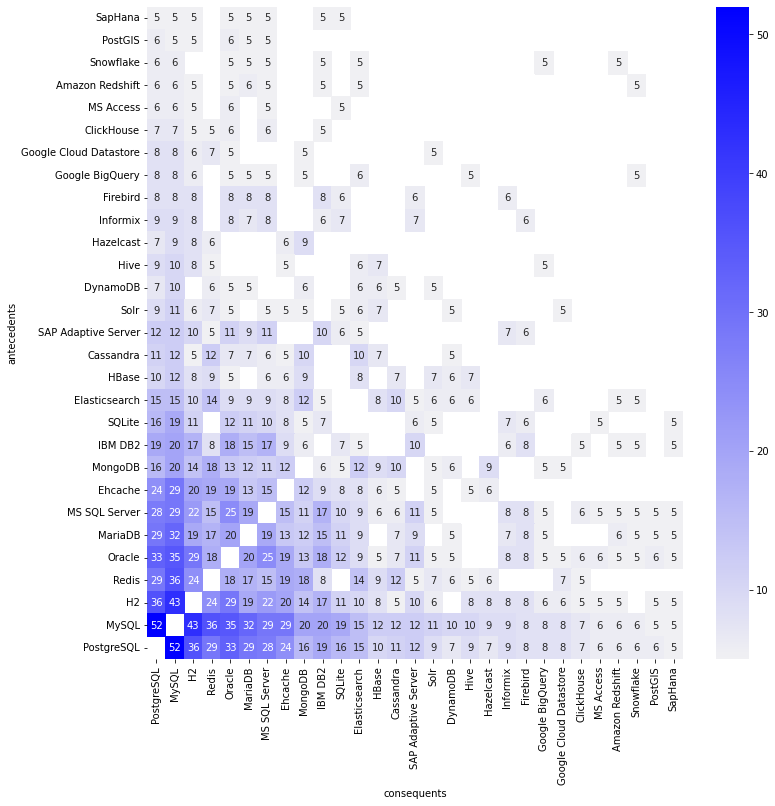

In [10]:
#Test sorting only by support, after the sort function
import seaborn as sns
pivot = orules1c.pivot(index='antecedents', columns='consequents', values='support_abs')
pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True, cmap=sns.color_palette("light:b", as_cmap=True), annot=True)
fig = plt.gcf()
fig.set_size_inches(12, 12)

Running the cells grouping by consequents and antecedents to identify the most used DBs together

In [114]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support',], ascending=[False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.07)] 
rules1c

antecedent support  antecedent_sup_abs  \
antecedents   consequents                                           
PostgreSQL    MySQL                  0.309645                61.0   
MySQL         PostgreSQL             0.441624                87.0   
              H2                     0.441624                87.0   
H2            MySQL                  0.299492                59.0   
MySQL         Redis                  0.441624                87.0   
...                                       ...                 ...   
MS SQL Server SapHana                0.157360                31.0   
              Snowflake              0.157360                31.0   
              Solr                   0.157360                31.0   
MariaDB       DynamoDB               0.182741                36.0   
Solr          SQLite                 0.065990                13.0   

                           consequent support  consequent_sup_abs   support  \
antecedents   consequents                                                     
PostgreSQL    MySQL                  0.441624                87.0  0.263959   
MySQL         PostgreSQL             0.309645                61.0  0.263959   
              H2                     0.299492                59.0  0.218274   
H2            MySQL                  0.441624                87.0  0.218274   
MySQL         Redis                  0.263959                52.0  0.182741   
...                                       ...                 ...       ...   
MS SQL Server SapHana                0.025381                 5.0  0.025381   
              Snowflake              0.030457                 6.0  0.025381   
              Solr                   0.065990                13.0  0.025381   
MariaDB       DynamoDB               0.065990                13.0  0.025381   
Solr          SQLite                 0.137056                27.0  0.025381   

                           support_abs  confidence      lift  leverage  \
antecedents   consequents                                                
PostgreSQL    MySQL               52.0    0.852459  1.930281  0.127213   
MySQL         PostgreSQL          52.0    0.597701  1.930281  0.127213   
              H2                  43.0    0.494253  1.650302  0.086011   
H2            MySQL               43.0    0.728814  1.650302  0.086011   
MySQL         Redis               36.0    0.413793  1.567639  0.066170   
...                                ...         ...       ...       ...   
MS SQL Server SapHana              5.0    0.161290  6.354839  0.021387   
              Snowflake            5.0    0.161290  5.295699  0.020588   
              Solr                 5.0    0.161290  2.444169  0.014997   
MariaDB       DynamoDB             5.0    0.138889  2.104701  0.013322   
Solr          SQLite               5.0    0.384615  2.806268  0.016336   

                           conviction  antecedent_len  consequente_len  
antecedents   consequents                                               
PostgreSQL    MySQL          3.784546             1.0              1.0  
MySQL         PostgreSQL     1.716026             1.0              1.0  
              H2             1.385095             1.0              1.0  
H2            MySQL          2.059010             1.0              1.0  
MySQL         Redis          1.255599             1.0              1.0  
...                               ...             ...              ...  
MS SQL Server SapHana        1.162046             1.0              1.0  
              Snowflake      1.155994             1.0              1.0  
              Solr           1.113627             1.0              1.0  
MariaDB       DynamoDB       1.084657             1.0              1.0  
Solr          SQLite         1.402284             1.0              1.0  

[414 rows x 12 columns]

In [115]:
#rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['consequent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.108774,21.428571,0.441624,87.0,0.085932,16.928571,0.843323,1.909593,0.037894,NaN,1.0,1.0
PostgreSQL,0.113488,22.357143,0.309645,61.0,0.078136,15.392857,0.781508,2.523888,0.042995,NaN,1.0,1.0
Redis,0.147742,29.105263,0.263959,52.0,0.069463,13.684211,0.507044,1.920918,0.030465,1.686226,1.0,1.0
H2,0.118899,23.423077,0.299492,59.0,0.066966,13.192308,0.641148,2.140782,0.031357,NaN,1.0,1.0
Ehcache,0.172272,33.937500,0.218274,43.0,0.064404,12.687500,0.385945,1.768168,0.026801,1.281182,1.0,1.0
Oracle,0.119485,23.538462,0.253807,50.0,0.063061,12.423077,0.638405,2.515317,0.032735,NaN,1.0,1.0
MariaDB,0.138023,27.190476,0.182741,36.0,0.062364,12.285714,0.590035,3.228804,0.037142,NaN,1.0,1.0
MS SQL Server,0.127750,25.166667,0.157360,31.0,0.059222,11.666667,0.607226,3.858823,0.039119,NaN,1.0,1.0
MongoDB,0.163847,32.277778,0.152284,30.0,0.053017,10.444444,0.390321,2.563110,0.028066,1.512583,1.0,1.0


In [116]:
#rules1ca = rules1c.groupby('antecedents').mean().sort_values(['antecedent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby('antecedents').mean().sort_values('support', ascending=False)
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.441624,87.0,0.108774,21.428571,0.085932,16.928571,0.194581,1.909593,0.037894,1.131064,1.0,1.0
PostgreSQL,0.309645,61.0,0.113488,22.357143,0.078136,15.392857,0.252342,2.523888,0.042995,1.295733,1.0,1.0
Redis,0.263959,52.0,0.147742,29.105263,0.069463,13.684211,0.263158,1.920918,0.030465,1.197324,1.0,1.0
H2,0.299492,59.0,0.118899,23.423077,0.066966,13.192308,0.223598,2.140782,0.031357,1.184453,1.0,1.0
Ehcache,0.218274,43.0,0.172272,33.937500,0.064404,12.687500,0.295058,1.768168,0.026801,1.218461,1.0,1.0
Oracle,0.253807,50.0,0.119485,23.538462,0.063061,12.423077,0.248462,2.515317,0.032735,1.233606,1.0,1.0
MariaDB,0.182741,36.0,0.138023,27.190476,0.062364,12.285714,0.341270,3.228804,0.037142,1.568395,1.0,1.0
MS SQL Server,0.157360,31.0,0.127750,25.166667,0.059222,11.666667,0.376344,3.858823,0.039119,2.020680,1.0,1.0
MongoDB,0.152284,30.0,0.163847,32.277778,0.053017,10.444444,0.348148,2.563110,0.028066,1.324415,1.0,1.0


In [117]:
# To filter only the 10 most used in the current version
rules1cb = rules1ca[(rules1ca['support'] >= 0.05)] 
rules1cb

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.441624,87.0,0.108774,21.428571,0.085932,16.928571,0.194581,1.909593,0.037894,1.131064,1.0,1.0
PostgreSQL,0.309645,61.0,0.113488,22.357143,0.078136,15.392857,0.252342,2.523888,0.042995,1.295733,1.0,1.0
Redis,0.263959,52.0,0.147742,29.105263,0.069463,13.684211,0.263158,1.920918,0.030465,1.197324,1.0,1.0
H2,0.299492,59.0,0.118899,23.423077,0.066966,13.192308,0.223598,2.140782,0.031357,1.184453,1.0,1.0
Ehcache,0.218274,43.0,0.172272,33.937500,0.064404,12.687500,0.295058,1.768168,0.026801,1.218461,1.0,1.0
Oracle,0.253807,50.0,0.119485,23.538462,0.063061,12.423077,0.248462,2.515317,0.032735,1.233606,1.0,1.0
MariaDB,0.182741,36.0,0.138023,27.190476,0.062364,12.285714,0.341270,3.228804,0.037142,1.568395,1.0,1.0
MS SQL Server,0.157360,31.0,0.127750,25.166667,0.059222,11.666667,0.376344,3.858823,0.039119,2.020680,1.0,1.0
MongoDB,0.152284,30.0,0.163847,32.277778,0.053017,10.444444,0.348148,2.563110,0.028066,1.324415,1.0,1.0


Identifying the antecedents and consequences that lead to the use of the 10 most used DBs

In [31]:
rules2 = df[ (df['consequents'].str.contains('MySQL')) &(df['confidence'] > 0.7)]
rules2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
228,SapHana,MySQL,0.025381,5.0,0.441624,87.0,0.025381,5.0,1.000000,2.264368,0.014172,inf,1,1
231,Informix,MySQL,0.045685,9.0,0.441624,87.0,0.045685,9.0,1.000000,2.264368,0.025510,inf,1,1
232,Firebird,MySQL,0.040609,8.0,0.441624,87.0,0.040609,8.0,1.000000,2.264368,0.022675,inf,1,1
234,MS Access,MySQL,0.030457,6.0,0.441624,87.0,0.030457,6.0,1.000000,2.264368,0.017006,inf,1,1
236,ClickHouse,MySQL,0.035533,7.0,0.441624,87.0,0.035533,7.0,1.000000,2.264368,0.019841,inf,1,1
238,SAP Adaptive Server,MySQL,0.060914,12.0,0.441624,87.0,0.060914,12.0,1.000000,2.264368,0.034013,inf,1,1
240,Amazon Redshift,MySQL,0.030457,6.0,0.441624,87.0,0.030457,6.0,1.000000,2.264368,0.017006,inf,1,1
242,Snowflake,MySQL,0.030457,6.0,0.441624,87.0,0.030457,6.0,1.000000,2.264368,0.017006,inf,1,1
244,IBM DB2,MySQL,0.101523,20.0,0.441624,87.0,0.101523,20.0,1.000000,2.264368,0.056688,inf,1,1
269,MS SQL Server,MySQL,0.157360,31.0,0.441624,87.0,0.147208,29.0,0.935484,2.118280,0.077714,8.654822,1,1


In [32]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL')) | (df['antecedents'].str.contains('PostgreSQL'))] #(df['confidence'] > 0.7) ]
rules3

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
144,Informix,PostgreSQL,0.045685,9.0,0.309645,61.0,0.045685,9.0,1.000000,3.229508,0.031539,inf,1,1
145,PostgreSQL,Snowflake,0.309645,61.0,0.030457,6.0,0.030457,6.0,0.098361,3.229508,0.021026,1.075311,1,1
146,PostgreSQL,Amazon Redshift,0.309645,61.0,0.030457,6.0,0.030457,6.0,0.098361,3.229508,0.021026,1.075311,1,1
147,Amazon Redshift,PostgreSQL,0.030457,6.0,0.309645,61.0,0.030457,6.0,1.000000,3.229508,0.021026,inf,1,1
148,Snowflake,PostgreSQL,0.030457,6.0,0.309645,61.0,0.030457,6.0,1.000000,3.229508,0.021026,inf,1,1
149,PostgreSQL,Informix,0.309645,61.0,0.045685,9.0,0.045685,9.0,0.147541,3.229508,0.031539,1.119485,1,1
150,PostgreSQL,Firebird,0.309645,61.0,0.040609,8.0,0.040609,8.0,0.131148,3.229508,0.028035,1.104205,1,1
151,Firebird,PostgreSQL,0.040609,8.0,0.309645,61.0,0.040609,8.0,1.000000,3.229508,0.028035,inf,1,1
152,PostgreSQL,MS Access,0.309645,61.0,0.030457,6.0,0.030457,6.0,0.098361,3.229508,0.021026,1.075311,1,1
153,SAP Adaptive Server,PostgreSQL,0.060914,12.0,0.309645,61.0,0.060914,12.0,1.000000,3.229508,0.042052,inf,1,1


In [33]:
rules4 = df[(df['consequents'].str.contains('H2')) & (df['confidence'] > 0.7) ]
rules4

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
134,Firebird,H2,0.040609,8.0,0.299492,59.0,0.040609,8.0,1.000000,3.338983,0.028447,inf,1,1
135,SapHana,H2,0.025381,5.0,0.299492,59.0,0.025381,5.0,1.000000,3.338983,0.017779,inf,1,1
170,Informix,H2,0.045685,9.0,0.299492,59.0,0.040609,8.0,0.888889,2.967985,0.026927,6.304569,1,1
176,IBM DB2,H2,0.101523,20.0,0.299492,59.0,0.086294,17.0,0.850000,2.838136,0.055889,4.670051,1,1
181,SAP Adaptive Server,H2,0.060914,12.0,0.299492,59.0,0.050761,10.0,0.833333,2.782486,0.032518,4.203046,1,1
182,PostGIS,H2,0.030457,6.0,0.299492,59.0,0.025381,5.0,0.833333,2.782486,0.016259,4.203046,1,1
186,MS Access,H2,0.030457,6.0,0.299492,59.0,0.025381,5.0,0.833333,2.782486,0.016259,4.203046,1,1
187,Amazon Redshift,H2,0.030457,6.0,0.299492,59.0,0.025381,5.0,0.833333,2.782486,0.016259,4.203046,1,1
211,Hive,H2,0.055838,11.0,0.299492,59.0,0.040609,8.0,0.727273,2.428351,0.023886,2.568528,1,1
213,ClickHouse,H2,0.035533,7.0,0.299492,59.0,0.025381,5.0,0.714286,2.384988,0.014739,2.451777,1,1


In [34]:
rules5 = df[(df['consequents'].str.contains('Oracle')) & (df['confidence'] > 0.7) ]
rules5

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
104,MS Access,Oracle,0.030457,6.0,0.253807,50.0,0.030457,6.0,1.000000,3.940000,0.022727,inf,1,1
106,Firebird,Oracle,0.040609,8.0,0.253807,50.0,0.040609,8.0,1.000000,3.940000,0.030302,inf,1,1
108,SapHana,Oracle,0.025381,5.0,0.253807,50.0,0.025381,5.0,1.000000,3.940000,0.018939,inf,1,1
109,PostGIS,Oracle,0.030457,6.0,0.253807,50.0,0.030457,6.0,1.000000,3.940000,0.022727,inf,1,1
118,SAP Adaptive Server,Oracle,0.060914,12.0,0.253807,50.0,0.055838,11.0,0.916667,3.611667,0.040377,8.954315,1,1
122,IBM DB2,Oracle,0.101523,20.0,0.253807,50.0,0.091371,18.0,0.900000,3.546000,0.065603,7.461929,1,1
127,Informix,Oracle,0.045685,9.0,0.253807,50.0,0.040609,8.0,0.888889,3.502222,0.029014,6.715736,1,1
131,ClickHouse,Oracle,0.035533,7.0,0.253807,50.0,0.030457,6.0,0.857143,3.377143,0.021438,5.223350,1,1
140,Snowflake,Oracle,0.030457,6.0,0.253807,50.0,0.025381,5.0,0.833333,3.283333,0.017651,4.477157,1,1
141,Amazon Redshift,Oracle,0.030457,6.0,0.253807,50.0,0.025381,5.0,0.833333,3.283333,0.017651,4.477157,1,1


In [35]:
rules6 = df[(df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules6


,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
253,MS SQL Server,Ehcache,0.157360,31.0,0.218274,43.0,0.076142,15.0,0.483871,2.216804,0.041794,1.514594,1,1
274,Hive,Ehcache,0.055838,11.0,0.218274,43.0,0.025381,5.0,0.454545,2.082452,0.013193,1.433164,1,1
277,IBM DB2,Ehcache,0.101523,20.0,0.218274,43.0,0.045685,9.0,0.450000,2.061628,0.023525,1.421320,1,1
293,Hazelcast,Ehcache,0.071066,14.0,0.218274,43.0,0.030457,6.0,0.428571,1.963455,0.014945,1.368020,1,1
316,MongoDB,Ehcache,0.152284,30.0,0.218274,43.0,0.060914,12.0,0.400000,1.832558,0.027674,1.302876,1,1
317,HBase,Ehcache,0.076142,15.0,0.218274,43.0,0.030457,6.0,0.400000,1.832558,0.013837,1.302876,1,1
321,PostgreSQL,Ehcache,0.309645,61.0,0.218274,43.0,0.121827,24.0,0.393443,1.802516,0.054240,1.288791,1,1
330,Solr,Ehcache,0.065990,13.0,0.218274,43.0,0.025381,5.0,0.384615,1.762075,0.010977,1.270305,1,1
339,Oracle,Ehcache,0.253807,50.0,0.218274,43.0,0.096447,19.0,0.380000,1.740930,0.041047,1.260848,1,1
349,Redis,Ehcache,0.263959,52.0,0.218274,43.0,0.096447,19.0,0.365385,1.673971,0.038831,1.231810,1,1


In [40]:
rules7 = df[ (df['consequents'].str.contains('Redis')) ] #& (df['confidence'] > 0.7)]
rules7

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
143,Cassandra,Redis,0.071066,14.0,0.263959,52.0,0.060914,12.0,0.857143,3.247253,0.042155,5.152284,1,1
193,ClickHouse,Redis,0.035533,7.0,0.263959,52.0,0.025381,5.0,0.714286,2.706044,0.016001,2.576142,1,1
222,Elasticsearch,Redis,0.116751,23.0,0.263959,52.0,0.071066,14.0,0.608696,2.306020,0.040248,1.880993,1,1
225,MongoDB,Redis,0.152284,30.0,0.263959,52.0,0.091371,18.0,0.600000,2.273077,0.051174,1.840102,1,1
227,HBase,Redis,0.076142,15.0,0.263959,52.0,0.045685,9.0,0.600000,2.273077,0.025587,1.840102,1,1
280,Solr,Redis,0.065990,13.0,0.263959,52.0,0.035533,7.0,0.538462,2.039941,0.018114,1.594755,1,1
306,Google Cloud Datastore,Redis,0.071066,14.0,0.263959,52.0,0.035533,7.0,0.500000,1.894231,0.016774,1.472081,1,1
313,MS SQL Server,Redis,0.157360,31.0,0.263959,52.0,0.076142,15.0,0.483871,1.833127,0.034605,1.426079,1,1
322,PostgreSQL,Redis,0.309645,61.0,0.263959,52.0,0.147208,29.0,0.475410,1.801072,0.065475,1.403077,1,1
325,MariaDB,Redis,0.182741,36.0,0.263959,52.0,0.086294,17.0,0.472222,1.788996,0.038058,1.394603,1,1


In [41]:
rules8 = df[ (df['consequents'].str.contains('SQLite')) & (df['confidence'] > 0.7) ]
rules8

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
24,SapHana,SQLite,0.025381,5.0,0.137056,27.0,0.025381,5.0,1.000000,7.296296,0.021902,inf,1,1
44,MS Access,SQLite,0.030457,6.0,0.137056,27.0,0.025381,5.0,0.833333,6.080247,0.021206,5.177665,1,1
54,Informix,SQLite,0.045685,9.0,0.137056,27.0,0.035533,7.0,0.777778,5.674897,0.029272,3.883249,1,1
58,Firebird,SQLite,0.040609,8.0,0.137056,27.0,0.030457,6.0,0.750000,5.472222,0.024891,3.451777,1,1


In [51]:
rules9 = df[(df['consequents'].str.contains('MongoDB')) & (df['confidence'] > 0.7) ]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
82,Cassandra,MongoDB,0.071066,14.0,0.152284,30.0,0.050761,10.0,0.714286,4.690476,0.039939,2.967005,1,1


In [46]:
rules10 = df[ (df['consequents'].str.contains('MS SQL Server')) & (df['confidence'] > 0.7) ]
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
39,Firebird,MS SQL Server,0.040609,8.0,0.15736,31.0,0.040609,8.0,1.000000,6.354839,0.034219,inf,1,1
41,SapHana,MS SQL Server,0.025381,5.0,0.15736,31.0,0.025381,5.0,1.000000,6.354839,0.021387,inf,1,1
50,SAP Adaptive Server,MS SQL Server,0.060914,12.0,0.15736,31.0,0.055838,11.0,0.916667,5.825269,0.046252,10.111675,1,1
56,Informix,MS SQL Server,0.045685,9.0,0.15736,31.0,0.040609,8.0,0.888889,5.648746,0.033420,7.583756,1,1
66,ClickHouse,MS SQL Server,0.035533,7.0,0.15736,31.0,0.030457,6.0,0.857143,5.447005,0.024865,5.898477,1,1
72,IBM DB2,MS SQL Server,0.101523,20.0,0.15736,31.0,0.086294,17.0,0.850000,5.401613,0.070319,5.617597,1,1
74,MS Access,MS SQL Server,0.030457,6.0,0.15736,31.0,0.025381,5.0,0.833333,5.295699,0.020588,5.055838,1,1
78,PostGIS,MS SQL Server,0.030457,6.0,0.15736,31.0,0.025381,5.0,0.833333,5.295699,0.020588,5.055838,1,1
79,Amazon Redshift,MS SQL Server,0.030457,6.0,0.15736,31.0,0.025381,5.0,0.833333,5.295699,0.020588,5.055838,1,1
80,Snowflake,MS SQL Server,0.030457,6.0,0.15736,31.0,0.025381,5.0,0.833333,5.295699,0.020588,5.055838,1,1


In [74]:
rules11 = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
282,MySQL,MariaDB,0.441624,87.0,0.182741,36.0,0.162437,32.0,0.367816,2.012771,0.081734,1.292755,1,1
285,MariaDB,MySQL,0.182741,36.0,0.441624,87.0,0.162437,32.0,0.888889,2.012771,0.081734,5.025381,1,1


Expected Patterns Session
In the rules below, we highlight the dependence presented in opposite directions and the expected correlation.

In [48]:
rules9 = df[((df['antecedents'].str.contains('MariaDB')) & (df['consequents'].str.contains('MySQL'))) | 
((df['antecedents'].str.contains('MySQL')) & (df['consequents'].str.contains('MariaDB')))]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
282,MySQL,MariaDB,0.441624,87.0,0.182741,36.0,0.162437,32.0,0.367816,2.012771,0.081734,1.292755,1,1
285,MariaDB,MySQL,0.182741,36.0,0.441624,87.0,0.162437,32.0,0.888889,2.012771,0.081734,5.025381,1,1


In [49]:
rules10 = df2[((df2['antecedents'].str.contains('PostgreSQL')) & (df2['consequents'].str.contains('PostGIS'))) | 
((df2['antecedents'].str.contains('PostGIS')) & (df2['consequents'].str.contains('PostgreSQL')))]
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
157,PostgreSQL,PostGIS,0.309645,61.0,0.030457,6.0,0.030457,6.0,0.098361,3.229508,0.021026,1.075311,1,1
161,PostGIS,PostgreSQL,0.030457,6.0,0.309645,61.0,0.030457,6.0,1.000000,3.229508,0.021026,inf,1,1


In [75]:
rules11a = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11a

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
282,MySQL,MariaDB,0.441624,87.0,0.182741,36.0,0.162437,32.0,0.367816,2.012771,0.081734,1.292755,1,1
285,MariaDB,MySQL,0.182741,36.0,0.441624,87.0,0.162437,32.0,0.888889,2.012771,0.081734,5.025381,1,1


In [76]:
rules12a = df[ (df['consequents'] .str.contains('PostgreSQL')) & (df['antecedents'] .str.contains('PostGIS'))|
             (df['antecedents'] .str.contains('PostgreSQL')) & (df['consequents'] .str.contains('PostGIS'))] #& (df['confidence'] > 0.7) ]
rules12a

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
157,PostgreSQL,PostGIS,0.309645,61.0,0.030457,6.0,0.030457,6.0,0.098361,3.229508,0.021026,1.075311,1,1
161,PostGIS,PostgreSQL,0.030457,6.0,0.309645,61.0,0.030457,6.0,1.000000,3.229508,0.021026,inf,1,1


Unexpected Patterns Session
In the rules below we highlight competition and high lift values.

In [50]:
rules12 = df2[(df2['lift'] > 10)] #>20
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Snowflake,Amazon Redshift,0.030457,6.0,0.030457,6.0,0.025381,5.0,0.833333,27.361111,0.024453,5.817259,1,1
1,Amazon Redshift,Snowflake,0.030457,6.0,0.030457,6.0,0.025381,5.0,0.833333,27.361111,0.024453,5.817259,1,1
2,Google BigQuery,Snowflake,0.045685,9.0,0.030457,6.0,0.025381,5.0,0.555556,18.240741,0.023989,2.181472,1,1
3,Snowflake,Google BigQuery,0.030457,6.0,0.045685,9.0,0.025381,5.0,0.833333,18.240741,0.023989,5.725888,1,1
4,Informix,Firebird,0.045685,9.0,0.040609,8.0,0.030457,6.0,0.666667,16.416667,0.028602,2.878173,1,1
5,Firebird,Informix,0.040609,8.0,0.045685,9.0,0.030457,6.0,0.750000,16.416667,0.028602,3.817259,1,1
6,Informix,SAP Adaptive Server,0.045685,9.0,0.060914,12.0,0.035533,7.0,0.777778,12.768519,0.032750,4.225888,1,1
7,SAP Adaptive Server,Informix,0.060914,12.0,0.045685,9.0,0.035533,7.0,0.583333,12.768519,0.032750,2.290355,1,1
8,Firebird,SAP Adaptive Server,0.040609,8.0,0.060914,12.0,0.030457,6.0,0.750000,12.312500,0.027983,3.756345,1,1
9,SAP Adaptive Server,Firebird,0.060914,12.0,0.040609,8.0,0.030457,6.0,0.500000,12.312500,0.027983,1.918782,1,1


In [ ]:
#if you need to generate the rules in excel
#rules_filter = df2.to_excel('historical_filters.xlsx', index=False)

In [61]:
rules14 = df2[(df2['confidence'] > 0.9)] #>20(['support_abs'], ascending=[False])
rules14 = rules14.sort_values(['lift'], ascending=False)
rules14

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
13,Firebird,IBM DB2,0.040609,8.0,0.101523,20.0,0.040609,8.0,1.000000,9.850000,0.036486,inf,1,1
15,SapHana,IBM DB2,0.025381,5.0,0.101523,20.0,0.025381,5.0,1.000000,9.850000,0.022804,inf,1,1
24,SapHana,SQLite,0.025381,5.0,0.137056,27.0,0.025381,5.0,1.000000,7.296296,0.021902,inf,1,1
39,Firebird,MS SQL Server,0.040609,8.0,0.157360,31.0,0.040609,8.0,1.000000,6.354839,0.034219,inf,1,1
41,SapHana,MS SQL Server,0.025381,5.0,0.157360,31.0,0.025381,5.0,1.000000,6.354839,0.021387,inf,1,1
50,SAP Adaptive Server,MS SQL Server,0.060914,12.0,0.157360,31.0,0.055838,11.0,0.916667,5.825269,0.046252,10.111675,1,1
60,Firebird,MariaDB,0.040609,8.0,0.182741,36.0,0.040609,8.0,1.000000,5.472222,0.033188,inf,1,1
62,Amazon Redshift,MariaDB,0.030457,6.0,0.182741,36.0,0.030457,6.0,1.000000,5.472222,0.024891,inf,1,1
65,SapHana,MariaDB,0.025381,5.0,0.182741,36.0,0.025381,5.0,1.000000,5.472222,0.020743,inf,1,1
109,PostGIS,Oracle,0.030457,6.0,0.253807,50.0,0.030457,6.0,1.000000,3.940000,0.022727,inf,1,1


In [77]:
rules15 = df2[(df2['lift'] > 8)] #& (df2['confidence'] > 0.5)] #>20(['support_abs'], ascending=[False])
rules15 = rules15.sort_values(['lift'], ascending=False)
rules15

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Snowflake,Amazon Redshift,0.030457,6.0,0.030457,6.0,0.025381,5.0,0.833333,27.361111,0.024453,5.817259,1,1
1,Amazon Redshift,Snowflake,0.030457,6.0,0.030457,6.0,0.025381,5.0,0.833333,27.361111,0.024453,5.817259,1,1
2,Google BigQuery,Snowflake,0.045685,9.0,0.030457,6.0,0.025381,5.0,0.555556,18.240741,0.023989,2.181472,1,1
3,Snowflake,Google BigQuery,0.030457,6.0,0.045685,9.0,0.025381,5.0,0.833333,18.240741,0.023989,5.725888,1,1
4,Informix,Firebird,0.045685,9.0,0.040609,8.0,0.030457,6.0,0.666667,16.416667,0.028602,2.878173,1,1
5,Firebird,Informix,0.040609,8.0,0.045685,9.0,0.030457,6.0,0.750000,16.416667,0.028602,3.817259,1,1
6,Informix,SAP Adaptive Server,0.045685,9.0,0.060914,12.0,0.035533,7.0,0.777778,12.768519,0.032750,4.225888,1,1
7,SAP Adaptive Server,Informix,0.060914,12.0,0.045685,9.0,0.035533,7.0,0.583333,12.768519,0.032750,2.290355,1,1
8,Firebird,SAP Adaptive Server,0.040609,8.0,0.060914,12.0,0.030457,6.0,0.750000,12.312500,0.027983,3.756345,1,1
9,SAP Adaptive Server,Firebird,0.060914,12.0,0.040609,8.0,0.030457,6.0,0.500000,12.312500,0.027983,1.918782,1,1


In [69]:
#rules15_filter = rules15.to_excel('rules_filters_liftv10.xlsx', index=False)